## Data and Libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
import math

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("../data/fotbal_prestupy_2000_2019.csv")

## EDA

In [3]:
data.shape

(4700, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Jméno               4700 non-null   object 
 1   Pozice              4700 non-null   object 
 2   Věk                 4700 non-null   int64  
 3   Původní tým         4700 non-null   object 
 4   Původní liga        4700 non-null   object 
 5   Nový tým            4700 non-null   object 
 6   Nová  Liga          4700 non-null   object 
 7   Sezóna              4700 non-null   object 
 8   Odhadovaná hodnota  3440 non-null   float64
 9   Přestupová částka   4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


In [5]:
# chybějící hodnoty
data.isna().sum()

Jméno                    0
Pozice                   0
Věk                      0
Původní tým              0
Původní liga             0
Nový tým                 0
Nová  Liga               0
Sezóna                   0
Odhadovaná hodnota    1260
Přestupová částka        0
dtype: int64

In [6]:
# přejmenování sloupců
data = data.rename(columns={"Jméno":"jmeno", "Pozice":"pozice", "Věk":"vek", "Původní tým": "puvodni_tym",
                    "Původní liga": "puvodni_liga", "Nový tým": "novy_tym", "Nová  Liga": "nova_liga",
                    "Sezóna":"sezona", "Odhadovaná hodnota": "odhadovana_hodnota", "Přestupová částka":
                    "prestupova_castka"})

In [7]:
data.head()

,jmeno,pozice,vek,puvodni_tym,puvodni_liga,novy_tym,nova_liga,sezona,odhadovana_hodnota,prestupova_castka
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


## Data Preprocessing

### column "jmeno"

In [8]:
# hledání duplicit - z důvodu obsažení jmena vícekrát ve sloupci, specifikace zadání 
data[data[["jmeno", "sezona", "vek", "prestupova_castka"]].duplicated()]

,jmeno,pozice,vek,puvodni_tym,puvodni_liga,novy_tym,nova_liga,sezona,odhadovana_hodnota,prestupova_castka
920,Hakan Yakin,Attacking Midfield,26,Paris SG,Ligue 1,FC Basel,Super League,2003-2004,NaN,1600000
3169,Francesco Acerbi,Centre-Back,24,AC Milan,Serie A,Genoa,Serie A,2012-2013,4000000.0,4000000
3250,Aleksandr Kokorin,Centre-Forward,22,Dinamo Moscow,Premier Liga,Anzhi,Premier Liga,2013-2014,12000000.0,19000000
3263,Igor Denisov,Defensive Midfield,29,Zenit S-Pb,Premier Liga,Anzhi,Premier Liga,2013-2014,16000000.0,15000000
3412,Aleksey Ionov,Right Winger,24,Anzhi,Premier Liga,Dinamo Moscow,Premier Liga,2013-2014,4000000.0,5000000
4693,Giangiacomo Magnani,Centre-Back,22,Perugia,Serie B,Juventus,Serie A,2018-2019,600000.0,5000000


In [9]:
# extrakce zduplikovaných jmen do proměnné "jmena_duplicated"
jmena_duplicated = list(data.loc[data[["jmeno", "sezona", "vek", "prestupova_castka"]].duplicated(), "jmeno"])

In [10]:
# kontrola duplicity
data[data["jmeno"].isin(jmena_duplicated)]

,jmeno,pozice,vek,puvodni_tym,puvodni_liga,novy_tym,nova_liga,sezona,odhadovana_hodnota,prestupova_castka
863,Hakan Yakin,Attacking Midfield,26,FC Basel,Super League,VfB Stuttgart,1.Bundesliga,2003-2004,NaN,2500000
919,Hakan Yakin,Attacking Midfield,26,FC Basel,Super League,Paris SG,Ligue 1,2003-2004,NaN,1600000
920,Hakan Yakin,Attacking Midfield,26,Paris SG,Ligue 1,FC Basel,Super League,2003-2004,NaN,1600000
3166,Francesco Acerbi,Centre-Back,24,Chievo Verona,Serie A,AC Milan,Serie A,2012-2013,4500000.0,4000000
3169,Francesco Acerbi,Centre-Back,24,AC Milan,Serie A,Genoa,Serie A,2012-2013,4000000.0,4000000
3248,Aleksandr Kokorin,Centre-Forward,22,Anzhi,Premier Liga,Dinamo Moscow,Premier Liga,2013-2014,15000000.0,19000000
3250,Aleksandr Kokorin,Centre-Forward,22,Dinamo Moscow,Premier Liga,Anzhi,Premier Liga,2013-2014,12000000.0,19000000
3262,Igor Denisov,Defensive Midfield,29,Anzhi,Premier Liga,Dinamo Moscow,Premier Liga,2013-2014,16000000.0,15000000
3263,Igor Denisov,Defensive Midfield,29,Zenit S-Pb,Premier Liga,Anzhi,Premier Liga,2013-2014,16000000.0,15000000
3411,Aleksey Ionov,Right Winger,24,Kuban Krasnodar,Premier Liga,Anzhi,Premier Liga,2013-2014,4000000.0,5000000


### column "pozice"

In [11]:
# četnost jednotlivé pozice
c = data["pozice"].value_counts()
p = data["pozice"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([c,p], axis=1, keys=['counts', '%']).rename(columns={"counts": "pocet"})

,pocet,%
Centre-Forward,1218,25.9%
Centre-Back,714,15.2%
Central Midfield,487,10.4%
Attacking Midfield,426,9.1%
Defensive Midfield,411,8.7%
Right Winger,305,6.5%
Left Winger,267,5.7%
Left-Back,225,4.8%
Right-Back,181,3.9%
Goalkeeper,180,3.8%


In [12]:
data[data["pozice"].str.contains("Sweeper")]

,jmeno,pozice,vek,puvodni_tym,puvodni_liga,novy_tym,nova_liga,sezona,odhadovana_hodnota,prestupova_castka
471,Thomas Hengen,Sweeper,26,VfL Wolfsburg,1.Bundesliga,1.FC K'lautern,1.Bundesliga,2001-2002,NaN,2250000


In [13]:
# nahrazení pozice "Sweeper" za "Defender"
data.loc[data["jmeno"].str.contains("Thomas Hengen"), "pozice"] = "Defender"

### column "vek"

In [14]:
# minimálně věk je 0 let
data["vek"].describe()

count    4700.000000
mean       24.338723
std         3.230809
min         0.000000
25%        22.000000
50%        24.000000
75%        27.000000
max        35.000000
Name: vek, dtype: float64

In [15]:
data[data["vek"] < 16]

,jmeno,pozice,vek,puvodni_tym,puvodni_liga,novy_tym,nova_liga,sezona,odhadovana_hodnota,prestupova_castka
236,Marzouq Al-Otaibi,Centre-Forward,0,Shabab,Saudi Arabia,Ittihad,Saudi Arabia,2000-2001,NaN,2000000
1370,Fran Mérida,Central Midfield,15,Barcelona Yth.,Spain,Arsenal U18,England,2005-2006,NaN,3200000


In [16]:
# nahrazeni spravneho veku u hrace
data.loc[data["jmeno"]== "Marzouq Al-Otaibi", "vek"] = 25

In [17]:
data["vek"].describe()

count    4700.000000
mean       24.344043
std         3.211250
min        15.000000
25%        22.000000
50%        24.000000
75%        27.000000
max        35.000000
Name: vek, dtype: float64

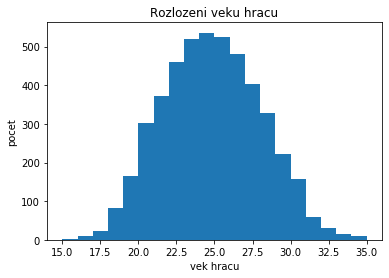

In [18]:
plt.hist(data["vek"], bins=20)
plt.xlabel("vek hracu")
plt.ylabel("pocet")
plt.title("Rozlozeni veku hracu")
plt.show()

### column "puvodni_liga"

In [19]:
data["puvodni_liga"].value_counts().head(10)

Premier League    608
Serie A           602
Ligue 1           428
LaLiga            418
1.Bundesliga      265
Série A           199
Championship      197
Eredivisie        190
Liga NOS          178
Premier Liga      169
Name: puvodni_liga, dtype: int64

In [20]:
# odstraneni white-space pred nazvem
data["puvodni_liga"] = data["puvodni_liga"].str.lstrip()

In [21]:
# kontrola zda Serie není špatné zapsána
data.loc[data["puvodni_liga"].str.contains("Série|Serie", case=False), "puvodni_liga"].value_counts()

Serie A                  602
Série A                  199
Serie B                  100
Eliteserien               17
Serie C - A                4
Série B                    4
Serie C - B                2
Serie A Segunda Etapa      1
Name: puvodni_liga, dtype: int64

### column "puvodni_tym"

In [22]:
data["puvodni_tym"] = data["puvodni_tym"].str.lstrip()

In [23]:
data["puvodni_tym"].value_counts().head(10)

Inter              68
Spurs              63
Juventus           59
Chelsea            57
Liverpool          56
FC Porto           56
Real Madrid        53
Atlético Madrid    52
Benfica            52
Udinese Calcio     51
Name: puvodni_tym, dtype: int64

### column "novy_tym"

In [24]:
data["novy_tym"] = data["novy_tym"].str.lstrip()

In [25]:
data["novy_tym"].value_counts().head(10)

Inter              97
Chelsea            96
Man City           94
Spurs              93
Juventus           87
Liverpool          85
AS Roma            77
Real Madrid        75
FC Barcelona       70
Atlético Madrid    69
Name: novy_tym, dtype: int64

### column "nova_liga"

In [26]:
data["nova_liga"] = data["nova_liga"].str.lstrip()

In [27]:
data["nova_liga"].value_counts().head(10)

Premier League    1256
Serie A            739
LaLiga             525
1.Bundesliga       422
Ligue 1            397
Premier Liga       328
Süper Lig          143
Liga NOS           127
Super League       122
Eredivisie         108
Name: nova_liga, dtype: int64

### column "sezona"

In [28]:
data["sezona"].value_counts()

2001-2002    250
2016-2017    250
2013-2014    250
2008-2009    250
2009-2010    249
2006-2007    249
2011-2012    249
2015-2016    248
2012-2013    248
2000-2001    248
2007-2008    248
2004-2005    248
2005-2006    247
2014-2015    246
2010-2011    245
2018-2019    245
2002-2003    244
2017-2018    244
2003-2004    242
Name: sezona, dtype: int64

In [29]:
# vytvoreni pouze roku, kdy byla sezona ukončena
data["rok"] = data["sezona"].str[5:].astype(int)

### column "odhadovana_cena"

In [30]:
data.loc[data["odhadovana_hodnota"].isna(), "sezona"].value_counts()

2001-2002    250
2000-2001    248
2002-2003    244
2003-2004    242
2004-2005    189
2005-2006     28
2006-2007     20
2007-2008     13
2008-2009      7
2010-2011      4
2017-2018      3
2018-2019      3
2012-2013      2
2013-2014      2
2009-2010      2
2014-2015      1
2016-2017      1
2011-2012      1
Name: sezona, dtype: int64

In [31]:
data["odhadovana_hodnota"].describe()

count    3.440000e+03
mean     8.622469e+06
std      8.795181e+06
min      5.000000e+04
25%      3.500000e+06
50%      6.000000e+06
75%      1.000000e+07
max      1.200000e+08
Name: odhadovana_hodnota, dtype: float64

### column "prestupova_castka"

In [32]:
data["prestupova_castka"].describe()

count    4.700000e+03
mean     9.447586e+06
std      1.043772e+07
min      8.250000e+05
25%      4.000000e+06
50%      6.500000e+06
75%      1.082000e+07
max      2.220000e+08
Name: prestupova_castka, dtype: float64

### puvodni_liga detail

In [33]:
# celková přestupová částka v milionech seskupená dle původní ligy a roku
puvodni_liga = data.groupby(["puvodni_liga", "rok"])["puvodni_liga", "prestupova_castka"].sum("prestupova_castka").sort_values("prestupova_castka", ascending=False).reset_index()
puvodni_liga['prestupova_castka'] = round((puvodni_liga['prestupova_castka'].astype(float)/1000000),1)
puvodni_liga.index =  np.arange(1,len(puvodni_liga)+1)
puvodni_liga.rename(columns={"prestupova_castka": "prestup_sum_M"}, inplace=True)
puvodni_liga.head(10)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,puvodni_liga,rok,prestup_sum_M
1,Premier League,2018,1092.5
2,LaLiga,2018,738.5
3,Premier League,2017,691.9
4,Serie A,2002,675.5
5,Ligue 1,2019,667.0
6,Serie A,2018,637.7
7,Serie A,2017,634.7
8,Premier League,2015,590.8
9,Premier League,2016,585.0
10,Serie A,2019,585.0


In [34]:
# počet přestupů seskupených dle původní ligy a roku
data.groupby(["puvodni_liga", "rok"]).size().reset_index(name="counts").sort_values(by="counts", ascending=False).head(10)

,puvodni_liga,rok,counts
477,Serie A,2013,46
476,Serie A,2012,44
387,Premier League,2018,44
377,Premier League,2008,43
474,Serie A,2010,42
370,Premier League,2001,42
378,Premier League,2009,41
483,Serie A,2019,40
386,Premier League,2017,38
385,Premier League,2016,38


In [35]:
# četnost původní liga
pl_1 = data["puvodni_liga"].value_counts()
pl_2 = data["puvodni_liga"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([pl_1,pl_2], axis=1, keys=['counts', '%']).reset_index().rename(columns={"counts": "pocet", "index": "odchody z"}).head(10)

,odchody z,pocet,%
0,Premier League,608,12.9%
1,Serie A,602,12.8%
2,Ligue 1,428,9.1%
3,LaLiga,418,8.9%
4,1.Bundesliga,265,5.6%
5,Série A,199,4.2%
6,Championship,197,4.2%
7,Eredivisie,190,4.0%
8,Liga NOS,178,3.8%
9,Premier Liga,169,3.6%


### puvodni_tym detail

In [36]:
# počet odchodů z týmu seskupený dle původní ligy a roku
data.groupby(["puvodni_tym", "rok"]).size().reset_index(name="pocet").sort_values(by="pocet", ascending=False).head(10)

,puvodni_tym,rok,pocet
167,Anzhi,2014,12
2403,Sunderland,2004,9
2360,Spurs,2016,8
1335,Inter,2013,8
109,AS Roma,2014,7
442,Bor. Dortmund,2018,7
1688,Monaco,2019,7
626,Chelsea,2018,7
1144,Galatasaray,2002,7
966,FC Porto,2006,7


In [37]:
data.groupby(["puvodni_tym"]).sum().reset_index()[["puvodni_tym", "prestupova_castka"]].sort_values("prestupova_castka", ascending=False).head(10)

,puvodni_tym,prestupova_castka
348,Monaco,948170000
197,FC Porto,917550000
426,Real Madrid,891400000
124,Chelsea,839530000
321,Liverpool,798410000
277,Juventus,797980000
76,Benfica,785750000
263,Inter,785280000
183,FC Barcelona,752100000
53,Atlético Madrid,734400000


### nova_liga detail

In [38]:
# celková přestupová částka v milionech seskupená dle nové ligy a roku
nova_liga = data.groupby(["nova_liga", "rok"])["nova_liga", "prestupova_castka"].sum("prestupova_castka").sort_values("prestupova_castka", ascending=False).reset_index()
nova_liga['prestupova_castka'] = round((nova_liga['prestupova_castka'].astype(float)/1000000),1)
nova_liga.index =  np.arange(1,len(nova_liga)+1)
nova_liga.rename(columns={"prestupova_castka": "prestup_sum_M"}, inplace=True)
nova_liga.head(10)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,nova_liga,rok,prestup_sum_M
1,Premier League,2018,1943.9
2,Premier League,2017,1462.5
3,Premier League,2016,1304.7
4,Premier League,2015,1108.2
5,Premier League,2019,1023.2
6,Premier League,2014,799.0
7,Premier League,2008,784.3
8,Serie A,2019,782.7
9,Premier League,2009,754.6
10,Serie A,2002,723.3


In [39]:
# počet příchodů do nových lig v čase
data.groupby(["nova_liga", "rok"]).size().reset_index(name="counts").sort_values(by="counts", ascending=False).head(10)

,nova_liga,rok,counts
216,Premier League,2016,86
208,Premier League,2008,82
218,Premier League,2018,79
215,Premier League,2015,75
202,Premier League,2002,73
217,Premier League,2017,73
209,Premier League,2009,71
206,Premier League,2006,69
205,Premier League,2005,68
213,Premier League,2013,67


In [40]:
# četnost příchodů do nové ligy
nl_1 = data["nova_liga"].value_counts()
nl_2 = data["nova_liga"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([nl_1,nl_2], axis=1, keys=['counts', '%']).reset_index().rename(columns={"counts": "pocet", "index": "prichody do"}).head(10)

,prichody do,pocet,%
0,Premier League,1256,26.7%
1,Serie A,739,15.7%
2,LaLiga,525,11.2%
3,1.Bundesliga,422,9.0%
4,Ligue 1,397,8.4%
5,Premier Liga,328,7.0%
6,Süper Lig,143,3.0%
7,Liga NOS,127,2.7%
8,Super League,122,2.6%
9,Eredivisie,108,2.3%


### novy tym detail

In [41]:
# který tým a v jakém roce provedl nejvíce nákupů
data.groupby(["novy_tym", "rok"]).size().reset_index(name="pocet").sort_values(by="pocet", ascending=False).head(10)

,novy_tym,rok,pocet
653,FC Porto,2005,12
473,Chelsea,2004,11
1567,Spurs,2005,10
546,Dinamo Moscow,2006,10
1431,SSC Napoli,2014,10
802,Genoa,2011,10
801,Genoa,2010,10
926,Juventus,2012,10
1055,Man City,2009,10
1571,Spurs,2009,9


In [42]:
data.groupby(["novy_tym"]).sum().reset_index()[["novy_tym", "prestupova_castka"]].sort_values("prestupova_castka", ascending=False).head(10)

,novy_tym,prestupova_castka
83,Chelsea,1820650000
192,Man City,1800520000
243,Real Madrid,1680650000
110,FC Barcelona,1673040000
194,Man Utd,1497360000
165,Juventus,1470940000
184,Liverpool,1412420000
221,Paris SG,1274780000
159,Inter,1202690000
282,Spurs,1024400000


### Dvojice tymy a liga

In [43]:
data["dvojice_tymy"] = data["puvodni_tym"] + "-" + data["novy_tym"]

In [44]:
data["dvojice_liga"] = data["puvodni_liga"] + "-" + data["nova_liga"]

In [45]:
pd.DataFrame(data["dvojice_liga"].value_counts()).reset_index().rename(columns={"dvojice_liga":"pocet", "index": "dvojice_liga"}).head(10)

,dvojice_liga,pocet
0,Premier League-Premier League,374
1,Serie A-Serie A,359
2,Ligue 1-Ligue 1,159
3,Championship-Premier League,151
4,LaLiga-LaLiga,147
5,1.Bundesliga-1.Bundesliga,136
6,Ligue 1-Premier League,125
7,LaLiga-Premier League,98
8,Premier Liga-Premier Liga,76
9,Serie B-Serie A,74


In [46]:
data[(data["puvodni_liga"]=="Serie A") & (data["rok"]==2002)].head()

,jmeno,pozice,vek,puvodni_tym,puvodni_liga,novy_tym,nova_liga,sezona,odhadovana_hodnota,prestupova_castka,rok,dvojice_tymy,dvojice_liga
248,Zinédine Zidane,Attacking Midfield,29,Juventus,Serie A,Real Madrid,LaLiga,2001-2002,NaN,77500000,2002,Juventus-Real Madrid,Serie A-LaLiga
249,Gianluigi Buffon,Goalkeeper,23,Parma,Serie A,Juventus,Serie A,2001-2002,NaN,52880000,2002,Parma-Juventus,Serie A-Serie A
251,Juan Sebastián Verón,Central Midfield,26,Lazio,Serie A,Man Utd,Premier League,2001-2002,NaN,42600000,2002,Lazio-Man Utd,Serie A-Premier League
252,Rui Costa,Attacking Midfield,29,Fiorentina,Serie A,AC Milan,Serie A,2001-2002,NaN,42000000,2002,Fiorentina-AC Milan,Serie A-Serie A
253,Lilian Thuram,Centre-Back,29,Parma,Serie A,Juventus,Serie A,2001-2002,NaN,41500000,2002,Parma-Juventus,Serie A-Serie A


In [47]:
data["dvojice_tymy"].value_counts().head(10)

Udinese Calcio-Juventus    7
Anzhi-Dinamo Moscow        7
Southampton-Liverpool      7
Parma-Inter                7
Udinese Calcio-Lazio       7
Arsenal-FC Barcelona       7
Inter-AS Roma              6
FC Barcelona-Chelsea       6
Genoa-Juventus             6
FC Porto-Dinamo Moscow     6
Name: dvojice_tymy, dtype: int64

## Statistika prestupové částky v čase

In [48]:
prestupy_merged_adj = data.groupby(["rok"]).agg(prestup_sum_M=("prestupova_castka", "sum"),
                            prestup_med_M=("prestupova_castka", "median"),
                            prestup_mean_M=("prestupova_castka", "mean"),
                            prestup_count=("prestupova_castka", "count"),
                            prestup_max_M=("prestupova_castka", "max")).reset_index()

In [49]:
prestupy_merged_adj

,rok,prestup_sum_M,prestup_med_M,prestup_mean_M,prestup_count,prestup_max_M
0,2001,1862900000,4500000.0,7.511694e+06,248,60000000
1,2002,2077080000,5275000.0,8.308320e+06,250,77500000
2,2003,1146175000,2555000.0,4.697439e+06,244,46000000
3,2004,1108510000,2500000.0,4.580620e+06,242,37500000
4,2005,1394190000,3500000.0,5.621734e+06,248,38500000
5,2006,1344070000,3600000.0,5.441579e+06,247,38000000
6,2007,1542840000,4500000.0,6.196145e+06,249,43300000
7,2008,2146740000,6800000.0,8.656210e+06,248,38000000
8,2009,2123720000,6350000.0,8.494880e+06,250,43000000
9,2010,2180770000,5700000.0,8.758112e+06,249,94000000


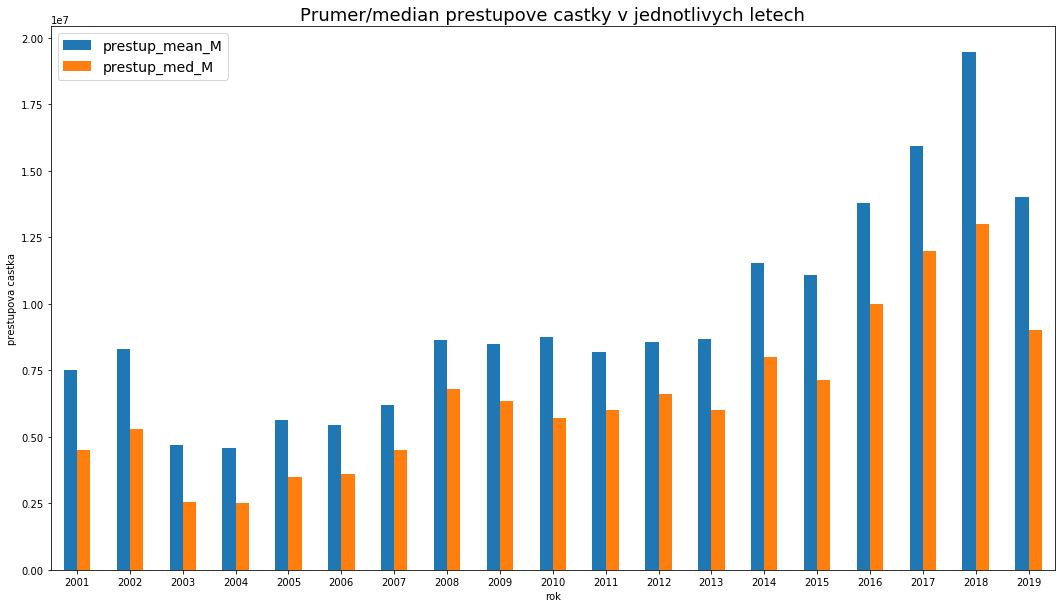

In [50]:
ax = prestupy_merged_adj.plot(x="rok", y=["prestup_mean_M", "prestup_med_M"], kind="bar", rot=0, figsize=(18,10))
plt.ylabel("prestupova castka")
plt.title("Prumer/median prestupove castky v jednotlivych letech", fontsize=18)
ax.legend(fontsize = 14)
plt.show()

In [54]:
# spočtení medianu přestupové částky v čase
median_prestupy = data.groupby(["rok"]).median("prestupova_castka").sort_values(by="rok", ascending=False).reset_index()[["rok", "prestupova_castka"]].rename(columns={"prestupova_castka":"prestup_med_M"})
median_prestupy['prestup_med_M'] = round((median_prestupy['prestup_med_M'].astype(float)/1000000),1)

In [55]:
# spočtení nejvyšší přestupové částky v čase
max_prestupy = data.groupby(["rok"]).max("prestupova_castka").sort_values(by="rok", ascending=False).reset_index()[["rok", "prestupova_castka"]].rename(columns={"prestupova_castka":"prestup_max_M"})
max_prestupy['prestup_max_M'] = round((max_prestupy['prestup_max_M'].astype(float)/1000000),1)

In [56]:
# spočtení sumy přestupové částky v čase
sum_prestupy = data.groupby(["rok"]).sum("prestupova_castka").sort_values(by="rok", ascending=False).reset_index()[["rok", "prestupova_castka"]].rename(columns={"prestupova_castka":"prestup_sum_M"})
sum_prestupy['prestup_sum_M'] = round((sum_prestupy['prestup_sum_M'].astype(float)/1000000),1)

Spojení výše vytvořených proměnných

In [57]:
prestupy_merged = pd.merge(median_prestupy, max_prestupy, how="inner", left_on="rok", right_on="rok")

In [58]:
prestupy_merged = pd.merge(prestupy_merged, sum_prestupy, how="inner", left_on="rok", right_on="rok")

In [59]:
prestupy_merged["max_prestup_procent"] = round(prestupy_merged["prestup_max_M"] / prestupy_merged["prestup_sum_M"] * 100, 2).astype(str) + "%"

In [60]:
prestupy_merged

,rok,prestup_med_M,prestup_max_M,prestup_sum_M,max_prestup_procent
0,2019,9.0,135.0,3435.7,3.93%
1,2018,13.0,222.0,4748.2,4.68%
2,2017,12.0,105.0,3979.9,2.64%
3,2016,10.0,76.0,3415.9,2.22%
4,2015,7.2,81.7,2728.2,2.99%
5,2014,8.0,101.0,2878.7,3.51%
6,2013,6.0,42.0,2152.1,1.95%
7,2012,6.6,42.0,2135.2,1.97%
8,2011,6.0,58.5,2002.7,2.92%
9,2010,5.7,94.0,2180.8,4.31%


### Nejdražší přestup

In [61]:
data[data["prestupova_castka"] == data["prestupova_castka"].max()]

,jmeno,pozice,vek,puvodni_tym,puvodni_liga,novy_tym,nova_liga,sezona,odhadovana_hodnota,prestupova_castka,rok,dvojice_tymy,dvojice_liga
4211,Neymar,Left Winger,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017-2018,100000000.0,222000000,2018,FC Barcelona-Paris SG,LaLiga-Ligue 1


### Suma přestupových částek v čase

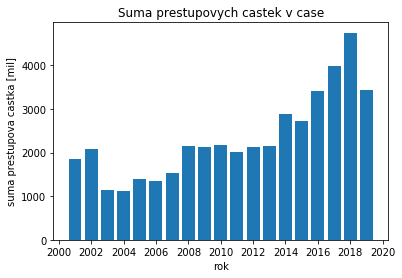

In [62]:
fig, ax = plt.subplots()
ax.bar(prestupy_merged["rok"], prestupy_merged["prestup_sum_M"])
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
plt.xlabel("rok")
plt.ylabel("suma prestupova castka [mil]")
plt.title("Suma prestupovych castek v case")
plt.show()

## Maximální přestupové částky dle jejich pozice a jejich roky

In [63]:
# maximální přestupové částky a jejich roky
max_prestup_castka_pozice = data.groupby(["pozice"]).max("prestupova_castka").sort_values(by="prestupova_castka", ascending=False).reset_index()[["pozice", "prestupova_castka", "rok"]]
max_prestup_castka_pozice.index = np.arange(1,len(max_prestup_castka_pozice)+1)
max_prestup_castka_pozice

,pozice,prestupova_castka,rok
1,Left Winger,222000000,2019
2,Right Winger,135000000,2019
3,Attacking Midfield,125000000,2019
4,Centre-Forward,117000000,2019
5,Central Midfield,105000000,2019
6,Centre-Back,78800000,2019
7,Goalkeeper,62500000,2019
8,Left-Back,57500000,2019
9,Defensive Midfield,57000000,2019
10,Right-Back,52700000,2019


## Přestupová částka (median) dle jednotlivých pozic

In [64]:
prestup_castka_pozice_adj = data.groupby("pozice").agg(prestup_pozice_mean_M=("prestupova_castka", "mean"),
                            prestup_pozice_median_M=("prestupova_castka", "median")).reset_index()

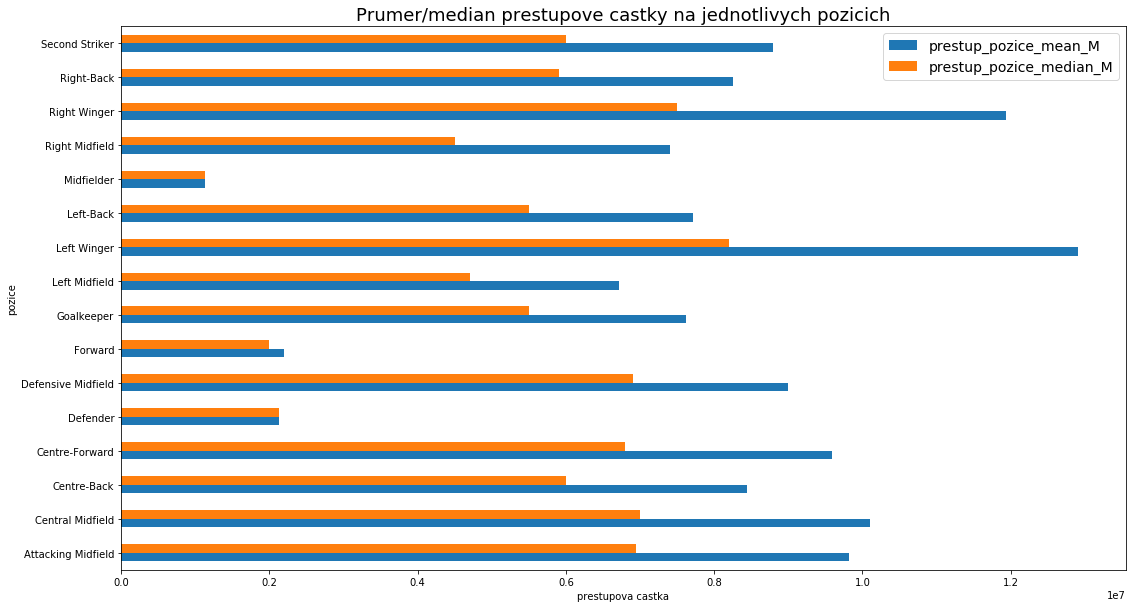

In [65]:
ax = prestup_castka_pozice_adj.plot(x="pozice", y=["prestup_pozice_mean_M", "prestup_pozice_median_M"], kind="barh", rot=0, figsize=(18,10))
plt.ylabel("pozice")
plt.xlabel("prestupova castka")
plt.title("Prumer/median prestupove castky na jednotlivych pozicich", fontsize=18)
ax.legend(fontsize = 14)
plt.show()

In [66]:
# median přestupových částek dle jednotlivých pozic - lepší než průměr
median_prestup_castka_pozice = data.groupby(["pozice"]).median("prestupova_castka").sort_values(by="prestupova_castka", ascending=False).reset_index()[["pozice", "prestupova_castka"]]
median_prestup_castka_pozice.index = np.arange(1,len(median_prestup_castka_pozice)+1)
median_prestup_castka_pozice = median_prestup_castka_pozice.rename(columns={"prestupova_castka": "prestup_med"})
median_prestup_castka_pozice['prestup_med_M'] = round((median_prestup_castka_pozice['prestup_med'].astype(float)/1000000),1)
median_prestup_castka_pozice[["pozice", "prestup_med_M"]]

,pozice,prestup_med_M
1,Left Winger,8.2
2,Right Winger,7.5
3,Central Midfield,7.0
4,Attacking Midfield,7.0
5,Defensive Midfield,6.9
6,Centre-Forward,6.8
7,Centre-Back,6.0
8,Second Striker,6.0
9,Right-Back,5.9
10,Goalkeeper,5.5


## Pozice v jednotlivých letech, jejich median a počet provedených přestupů v daném roce

In [67]:
pozice_rok_castka = data.groupby(["pozice", "rok"]).median("prestupova_castka").reset_index()[["pozice", "prestupova_castka", "rok"]]

In [68]:
pozice_rok_pocet = data.groupby(["pozice", "rok"]).count().reset_index()[["pozice", "jmeno", "rok"]]

In [69]:
pozice_pocet_roky =  pd.merge(pozice_rok_castka, pozice_rok_pocet["jmeno"], left_index=True, right_index=True)
pozice_pocet_roky.rename(columns={"jmeno": "pocet", "prestupova_castka": "prestup_med_M"}, inplace=True)
pozice_pocet_roky["prestup_med_M"] = round((pozice_pocet_roky['prestup_med_M'].astype(float)/1000000),1)
pozice_pocet_roky[pozice_pocet_roky["pozice"]=="Centre-Forward"]

,pozice,prestup_med_M,rok,pocet
57,Centre-Forward,5.0,2001,75
58,Centre-Forward,5.6,2002,73
59,Centre-Forward,3.0,2003,65
60,Centre-Forward,3.0,2004,74
61,Centre-Forward,4.7,2005,63
62,Centre-Forward,3.6,2006,72
63,Centre-Forward,5.0,2007,73
64,Centre-Forward,6.4,2008,72
65,Centre-Forward,7.0,2009,65
66,Centre-Forward,6.4,2010,66


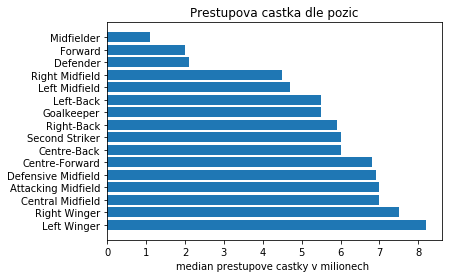

In [70]:
# zobrazení medianu přestupové částky dle jednotlivé pozice
fig, ax = plt.subplots()
ax.barh(median_prestup_castka_pozice["pozice"], median_prestup_castka_pozice["prestup_med_M"])
plt.xlabel("median prestupove castky v milionech ")
plt.title("Prestupova castka dle pozic")
plt.show()

## Přestupová částka - silně zatížena outliers

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


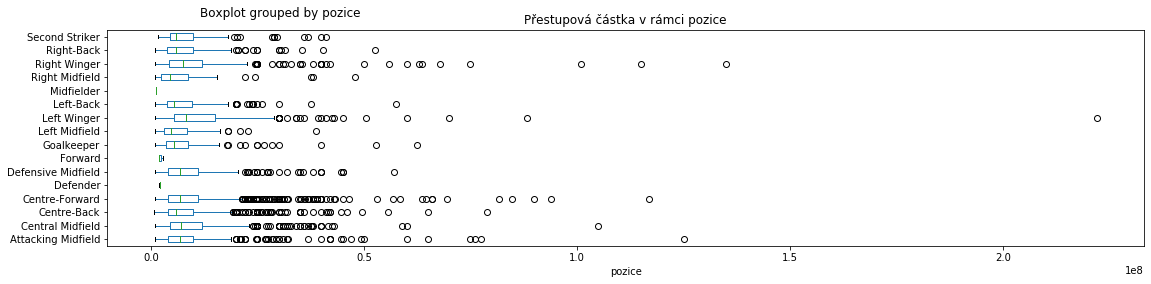

In [71]:
# přestupová částka v rámci pozice - silně zatíženo extrémními přestupovými částkami
data.boxplot(by ='pozice', column =['prestupova_castka'], grid = False, vert=False)
plt.subplots_adjust(right=2.5)
plt.title("Přestupová částka v rámci pozice")
plt.show()

In [72]:
data["prestupova_castka"].describe()

count    4.700000e+03
mean     9.447586e+06
std      1.043772e+07
min      8.250000e+05
25%      4.000000e+06
50%      6.500000e+06
75%      1.082000e+07
max      2.220000e+08
Name: prestupova_castka, dtype: float64

In [73]:
# spočítání 99 percentilu přestupových částek
percentile_ = np.percentile(data["prestupova_castka"], 99)

In [74]:
# po odstranění hodnot vyšších než 99 percentil ze sloupce přestupová částka budou nejvíce postiženy tyto pozice
data[data["prestupova_castka"]>percentile_].groupby("pozice").count().reset_index()[["pozice", "jmeno"]]

,pozice,jmeno
0,Attacking Midfield,7
1,Central Midfield,3
2,Centre-Back,4
3,Centre-Forward,13
4,Defensive Midfield,1
5,Goalkeeper,2
6,Left Winger,5
7,Left-Back,1
8,Right Winger,10
9,Right-Back,1


In [75]:
# odstranení extrémně vysokých částek z přestupové částky
data_no_extrem =data[data["prestupova_castka"]<percentile_]

In [76]:
# odstranění pozic s nízkým zastoupením pro lepší vizualizaci
data_no_extrem = data_no_extrem[(data_no_extrem["pozice"]!="Forward") & (data_no_extrem["pozice"]!="Midfielder") & (data_no_extrem["pozice"]!="Defender")]

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


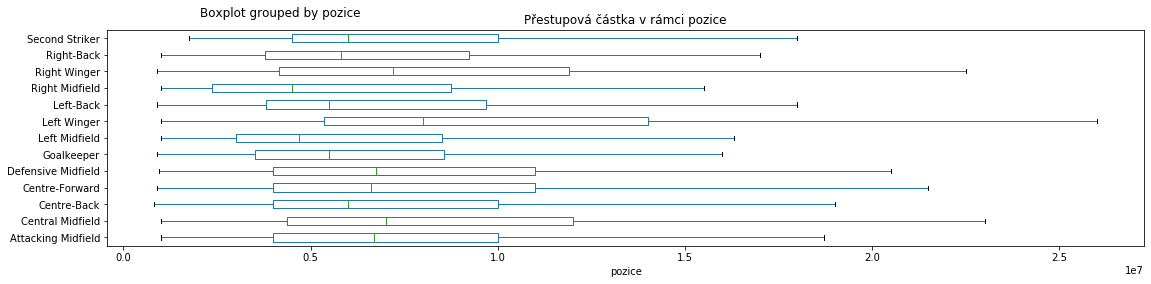

In [77]:
# přestupová částka v rámci pozice - bez outliers
data_no_extrem.boxplot(by ='pozice', column =['prestupova_castka'], grid = False, vert=False, showfliers=False)
plt.subplots_adjust(right=2.5)
plt.title("Přestupová částka v rámci pozice")
plt.show()

In [78]:
vek_prestup = data.groupby("vek").median("prestupova_castka").reset_index()[["vek", "prestupova_castka"]]

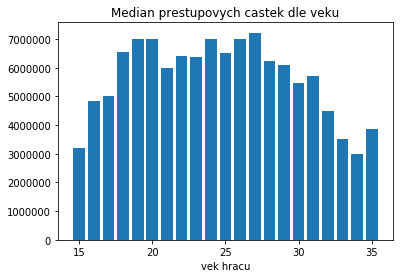

In [79]:
fig, ax = plt.subplots()
ax.bar(vek_prestup["vek"], vek_prestup["prestupova_castka"])
plt.xlabel("vek hracu")
plt.title("Median prestupovych castek dle veku")
plt.show()

In [80]:
data.groupby(["vek", "rok"]).median("prestupova_castka").reset_index()[["vek", "rok", "prestupova_castka"]].sort_values("prestupova_castka", ascending=False).head(10)

,vek,rok,prestupova_castka
309,33,2019,62500000.0
6,16,2018,21000000.0
7,16,2019,20000000.0
13,17,2008,19350000.0
285,31,2018,17000000.0
133,23,2018,17000000.0
152,24,2018,17000000.0
247,29,2018,16400000.0
301,32,2018,15100000.0
190,26,2018,15000000.0


### chybovost odhadovana_hodnota vs prestupova_castka

In [81]:
# rozdělení dat, kde odhadovana_hodnota není/je obsažena
unlabelled_data = data[data["odhadovana_hodnota"].isna()]
labelled_data = data[data["odhadovana_hodnota"].notna()]

In [82]:
# spočtení rozdílu v přestupové a odhadované hodnotě
labelled_data["error"] = labelled_data["prestupova_castka"] - labelled_data["odhadovana_hodnota"]

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [83]:
len(labelled_data[labelled_data["error"]<0])

1053

In [84]:
len(labelled_data[labelled_data["error"]>0])

2177

Více je kladných hodnot, tedy kde prestupova_castka větší než odhadovaná

In [85]:
labelled_data["abs_error"] = abs(labelled_data["prestupova_castka"] - labelled_data["odhadovana_hodnota"])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
np.mean(labelled_data)

C:\Users\DELL\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


vek                   2.439477e+01
odhadovana_hodnota    8.622469e+06
prestupova_castka     1.065296e+07
rok                   2.012459e+03
error                 2.030490e+06
abs_error             3.985379e+06
dtype: float64

In [87]:
sum(labelled_data.loc[labelled_data["rok"]==2006, "abs_error"]) / len(labelled_data.loc[labelled_data["rok"]==2006, "abs_error"])

2187077.6255707764

In [88]:
mean_abs_error = labelled_data.groupby("rok").mean("abs_error").reset_index()[["rok", "abs_error"]]

In [89]:
mean_abs_error.rename(columns={"abs_error": "mean_abs_error"}, inplace = True)
mean_abs_error

,rok,mean_abs_error
0,2005,2.185254e+06
1,2006,2.187078e+06
2,2007,2.531900e+06
3,2008,3.171191e+06
4,2009,3.014486e+06
5,2010,3.231296e+06
6,2011,2.996971e+06
7,2012,3.232903e+06
8,2013,3.239756e+06
9,2014,3.590786e+06


## Correlation

In [90]:
data_correlation = data.select_dtypes(include=["number"])

In [94]:
data_corr = data_correlation.corr()

In [95]:
data_corr.style.background_gradient(cmap='coolwarm').set_precision(4)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,vek,odhadovana_hodnota,prestupova_castka,rok
vek,1.0000,0.1427,-0.0030,-0.0178
odhadovana_hodnota,0.1427,1.0000,0.8306,0.2118
prestupova_castka,-0.0030,0.8306,1.0000,0.3119
rok,-0.0178,0.2118,0.3119,1.0000


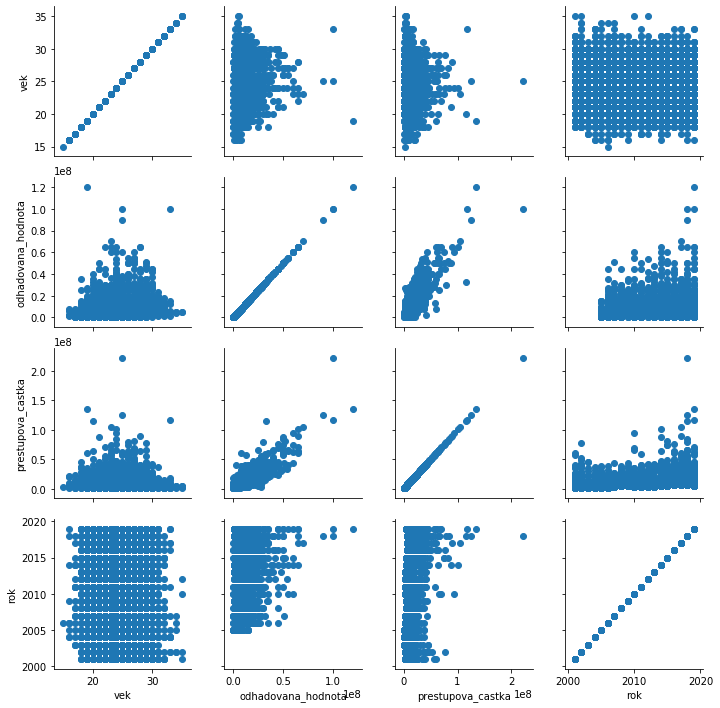

In [96]:
data_numbers = data.select_dtypes(include=["number"])
g = sns.PairGrid(data_numbers)
g.map(plt.scatter)
plt.show()

In [97]:
labelled_data_prestupy = labelled_data.groupby("rok").mean().reset_index()[["rok", "odhadovana_hodnota", "prestupova_castka"]]

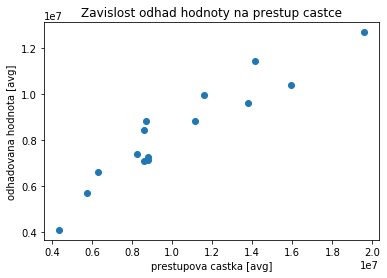

In [98]:
plt.scatter(labelled_data_prestupy["prestupova_castka"], labelled_data_prestupy["odhadovana_hodnota"])
plt.xlabel("prestupova castka [avg]")
plt.ylabel("odhadovana hodnota [avg]")
plt.title("Zavislost odhad hodnoty na prestup castce")
plt.show()

## TO DO

Rozdíl prodáno - nakoupeno v rámci týmů a zjistit tým, co vydělal nejvíce peněž v tom období.

Některý sezony nemají 250 přestupů, tak možná přepočítat.

In [99]:
puvodni_tym_prestup = data.groupby("puvodni_tym")["prestupova_castka"].sum().reset_index().rename(columns={"prestupova_castka": "ziskane_penize"})

In [100]:
novy_tym_prestup = data.groupby("novy_tym")["prestupova_castka"].sum().reset_index().rename(columns={"prestupova_castka": "utracene_penize"})

In [101]:
prestupyy = puvodni_tym_prestup.merge(novy_tym_prestup, left_on="puvodni_tym", right_on="novy_tym")

In [102]:
prestupyy["bilance"] = prestupyy["ziskane_penize"] - prestupyy["utracene_penize"]

In [103]:
prestupyy.sort_values(by="bilance", ascending=False).head(10)

,puvodni_tym,ziskane_penize,novy_tym,utracene_penize,bilance
98,FC Porto,917550000,FC Porto,360810000,556740000
35,Benfica,785750000,Benfica,334700000,451050000
263,Udinese Calcio,472500000,Udinese Calcio,130000000,342500000
216,River Plate,348230000,River Plate,23600000,324630000
191,Parma,554320000,Parma,290530000,263790000
174,Monaco,948170000,Monaco,685610000,262560000
6,AFC Ajax,460580000,AFC Ajax,215250000,245330000
228,Santos FC,275500000,Santos FC,30500000,245000000
150,LOSC Lille,344740000,LOSC Lille,124300000,220440000
242,Sporting CP,333600000,Sporting CP,124350000,209250000
